## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading dataset
df = pd.read_csv('/salaries.csv')
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1767,2024,MI,FT,Data Modeler,93400,USD,93400,US,0,US,M
10660,2023,SE,FT,Machine Learning Engineer,228830,USD,228830,US,0,US,M
2046,2024,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
6695,2023,MI,FT,Research Scientist,212800,USD,212800,US,0,US,L
8435,2023,SE,FT,Data Scientist,185000,USD,185000,US,100,US,M


# **Description of the features in dataset:**

**work_year**: The year in which the salary data was collected (e.g., 2024).

**experience_level**: The level of experience of the employee (e.g., MI for Mid-Level).

**employment_type**: The type of employment (e.g., FT for Full-Time).

**job_title**: The title of the job (e.g., Data Scientist).

**salary**: The salary amount.

**salary_currency**: The currency in which the salary is denominated (e.g., USD for US Dollars).

**salary_in_usd**: The salary amount converted to US Dollars.

**employee_residence**: The country of residence of the employee (e.g., AU for Australia).

**remote_ratio**: The ratio indicating the level of remote work (0 for no remote work).

**company_location**: The location of the company (e.g., AU for Australia).

**company_size**: The size of the company (e.g., S for Small).

In [ ]:
#Getting the basic informations about the dataset
df.shape

(16494, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


AS we can see the dataset is clean and there is no null values

In [ ]:
#Checking if there is any duplicate value
df.duplicated().sum()

6401

So there are 6401 duplicate rows and we have to delete them

In [ ]:
#Droping duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Checking the statistical metrics
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,10093.000000,1.009300e+04,10093.000000,10093.000000
mean,2023.225998,1.698488e+05,146652.170118,35.613792
std,0.783392,4.325478e+05,72684.650589,47.244864
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,9.577600e+04,95000.000000,0.000000
50%,2023.000000,1.400000e+05,138750.000000,0.000000
75%,2024.000000,1.885000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
#Checking value counts for categorical features
for i in df.columns:
  if df[i].dtypes == 'O':
    print(df[i].value_counts())

experience_level
SE    5943
MI    2753
EN    1008
EX     389
Name: count, dtype: int64
employment_type
FT    10013
PT       38
CT       28
FL       14
Name: count, dtype: int64
job_title
Data Engineer                    1839
Data Scientist                   1834
Data Analyst                     1381
Machine Learning Engineer         945
Analytics Engineer                354
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Data Analytics Associate            1
Name: count, Length: 155, dtype: int64
salary_currency
USD    9052
GBP     482
EUR     385
CAD      55
INR      55
AUD      12
CHF       8
PLN       7
SGD       6
BRL       5
DKK       4
JPY       4
TRY       3
HUF       3
ILS       2
NOK       2
THB       2
NZD       1
PHP       1
ZAR       1
HKD       1
MXN       1
CLP       1
Name: count, dtype: int64
employee_residence
US    8307
GB     5

## Since we have a column "salary_in_usd" so we can drop "salary" and "salary_currency" to reduce feature

In [ ]:
df = df.drop(['salary','salary_currency'],axis=1)
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
14490,2023,MI,FT,Machine Learning Engineer,110367,GB,0,GB,M
7759,2023,MI,FT,Data Engineer,158400,US,0,US,M
3634,2024,SE,FT,Data Architect,112500,GB,0,GB,M
5849,2024,MI,FT,Machine Learning Engineer,112000,US,0,US,M
8615,2023,SE,FT,Data Scientist,189750,US,100,US,M


## We had seen that in "job_title","employee_residence" and "company_location" there are many different values which is problematic for plotting. Let us modify that

# **For "job_title"**

In [ ]:
#for job_title we are choosing 300 as threshold value
a = df['job_title'].value_counts()
a[a>=300]

job_title
Data Engineer                1839
Data Scientist               1834
Data Analyst                 1381
Machine Learning Engineer     945
Analytics Engineer            354
Research Scientist            318
Name: count, dtype: int64

In [ ]:
#Transforming our column
def title_transform(x):
  if x not in ['Data Engineer','Data Scientist','Data Analyst','Machine Learning Engineer','Analytics Engineer','Research Scientist']:
    return 'other'
  else:
    return x
df['job_title'] = df['job_title'].apply(title_transform)
df['job_title'].value_counts()

job_title
other                        3422
Data Engineer                1839
Data Scientist               1834
Data Analyst                 1381
Machine Learning Engineer     945
Analytics Engineer            354
Research Scientist            318
Name: count, dtype: int64

# **For "employee_residence"**

In [ ]:
#for employee_residence we are choosing 100 as threshold value
b = df['employee_residence'].value_counts()
b[b>=100]

employee_residence
US    8307
GB     533
CA     402
Name: count, dtype: int64

In [ ]:
#Transforming our column
def residence_transform(x):
  if x not in ['US','GB','CA']:
    return 'other'
  else:
    return x
df['employee_residence'] = df['employee_residence'].apply(residence_transform)
df['employee_residence'].value_counts()

employee_residence
US       8307
other     851
GB        533
CA        402
Name: count, dtype: int64

# **For "company_location"**

In [ ]:
#for company_location we are choosing 100 as threshold value
c = df['company_location'].value_counts()
c[c>=100]

company_location
US    8358
GB     541
CA     404
DE     104
Name: count, dtype: int64

In [ ]:
#Transforming our column
def location_transform(x):
  if x not in ['US','GB','CA','DE']:
    return 'other'
  else:
    return x
df['company_location'] = df['company_location'].apply(location_transform)
df['company_location'].value_counts()

company_location
US       8358
other     686
GB        541
CA        404
DE        104
Name: count, dtype: int64

# **Data Visualization**

# **Univariate Analysis**

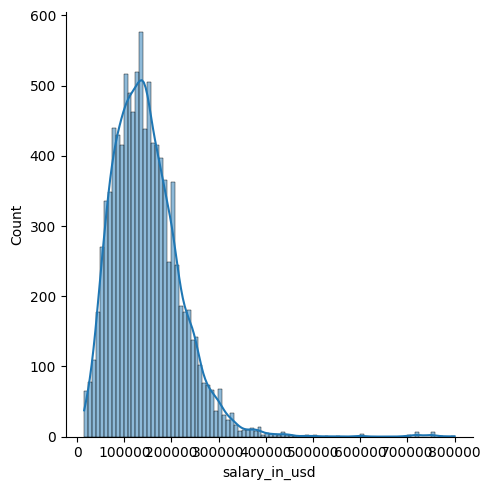

In [ ]:
#Checking the distribution of target feature "salary_in_usd"
sns.displot(x='salary_in_usd',data=df,kde=True)

### **As we can see the data is positively/right skewed**

<Axes: xlabel='salary_in_usd'>

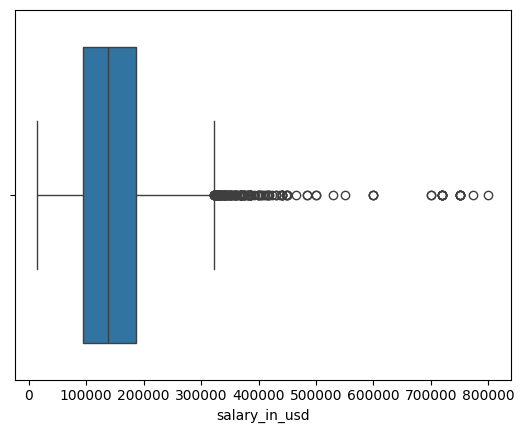

In [ ]:
#Checking for outliers
sns.boxplot(data=df,x="salary_in_usd")

**There are certain outliers present in the data**

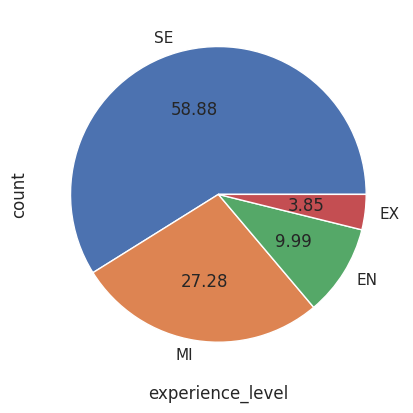

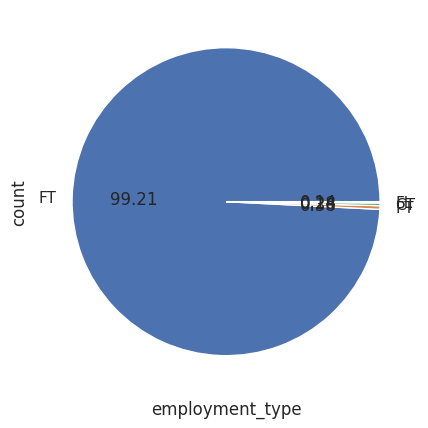

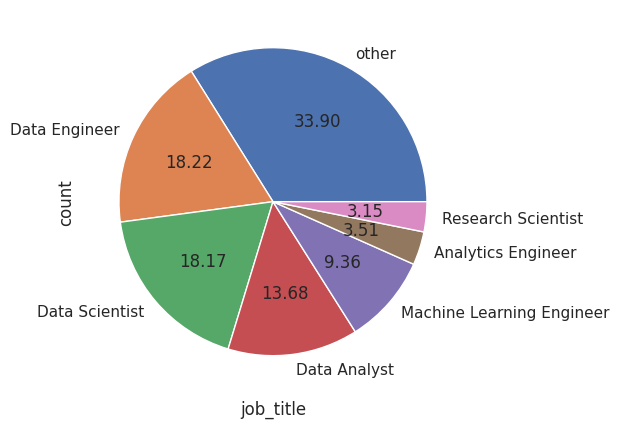

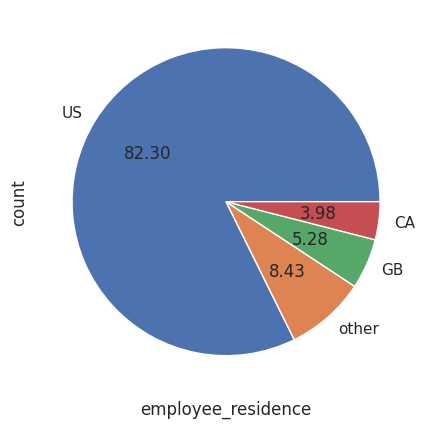

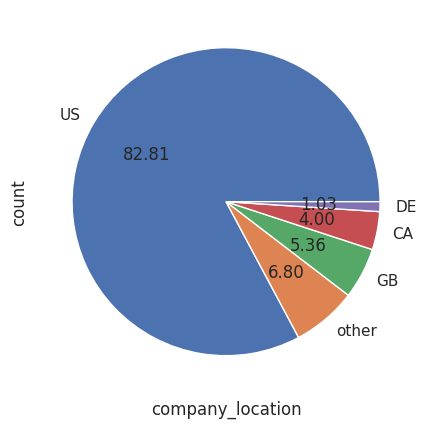

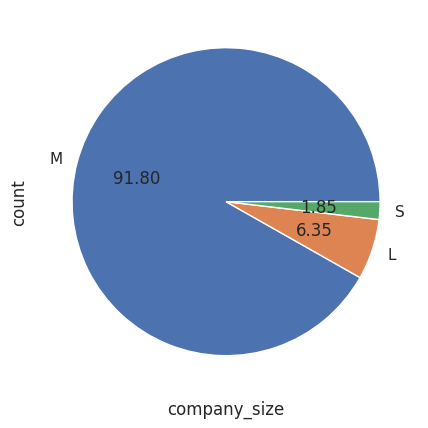

In [ ]:
#Viewing our categorical column with pie chart
for i in df.columns:
  if df[i].dtypes == 'O':
      plt.figure()
      plt.tight_layout()
      sns.set(rc={"figure.figsize":(18, 5)})
      # f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
      plt.gca().set(xlabel= i,ylabel='Frequency')
      # sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
      # sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)
      df[i].value_counts().plot(kind='pie',autopct='%0.2f'  )

# **Bivariate Analysis**

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

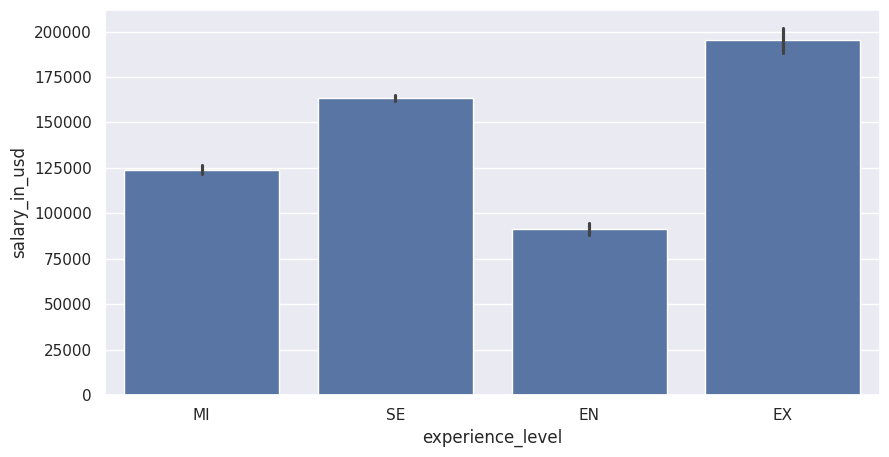

In [ ]:
#Viewing experience_level w.r.t salary_in_usd
sns.set(rc={"figure.figsize":(10, 5)})
sns.barplot(x='experience_level',y='salary_in_usd',data=df)

**EX which menas Expert level employees are highest paid and EN which means Entry level employees are least paid**

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

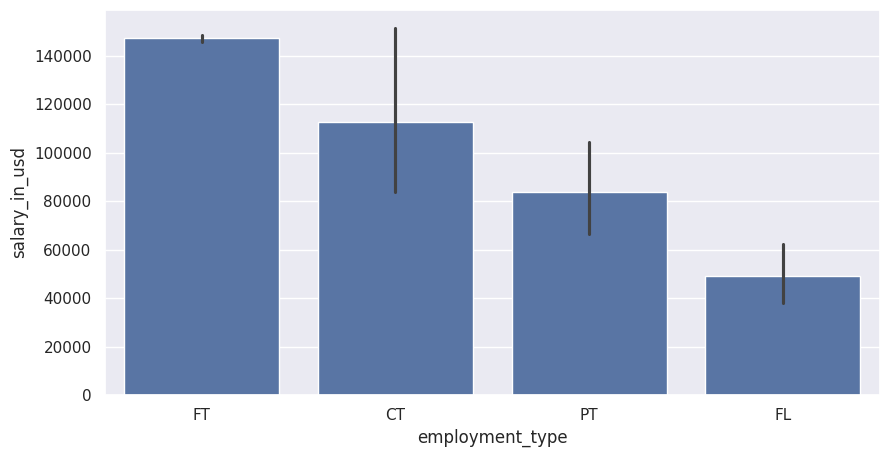

In [ ]:
#Viewing employment_type w.r.t salary_in_usd
sns.set(rc={"figure.figsize":(10, 5)})
sns.barplot(x='employment_type',y='salary_in_usd',data=df)

**Full time employees are the highest paid ones**

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

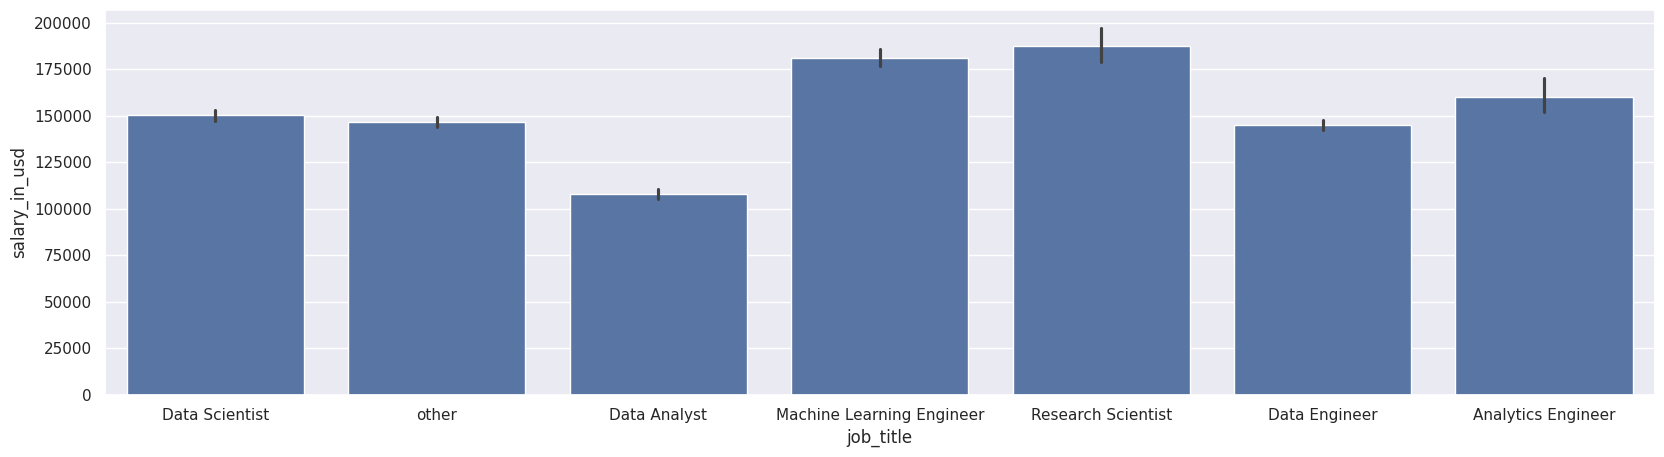

In [ ]:
#Viewing job_title w.r.t salary_in_usd
sns.set(rc={"figure.figsize":(20, 5)})
sns.barplot(x='job_title',y='salary_in_usd',data=df)

**Research Scientist job is the highest paid job**

<Axes: xlabel='company_size', ylabel='company_location'>

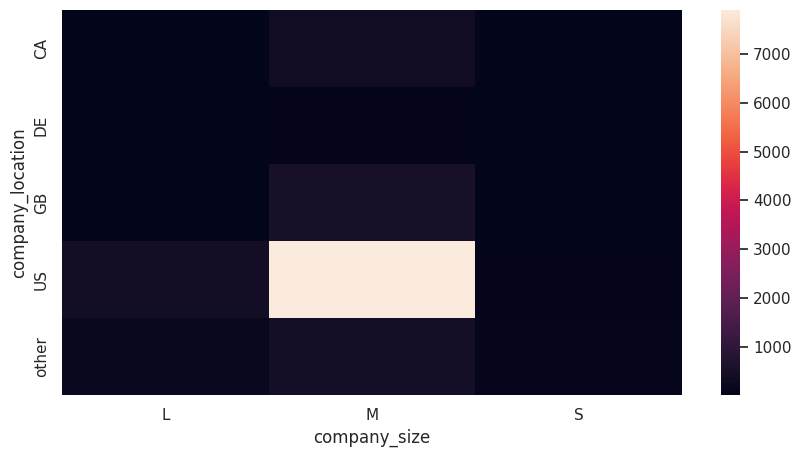

In [ ]:
#Viewing company_location w.r.t company_size
sns.heatmap(pd.crosstab(df['company_location'],df['company_size']))

**Most of the companies in US are Medium sized. Large and Small sized companies are less in number.**

<Axes: xlabel='employee_residence', ylabel='salary_in_usd'>

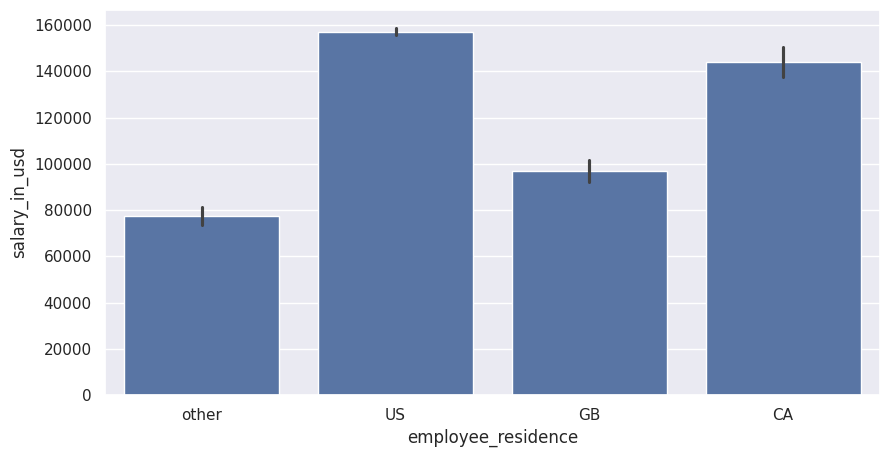

In [ ]:
#Viewing employee_residence w.r.t salary_in_usd
sns.set(rc={"figure.figsize":(10, 5)})
sns.barplot(x='employee_residence',y='salary_in_usd',data=df)

**People working in US are earning more than every other countries.**

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

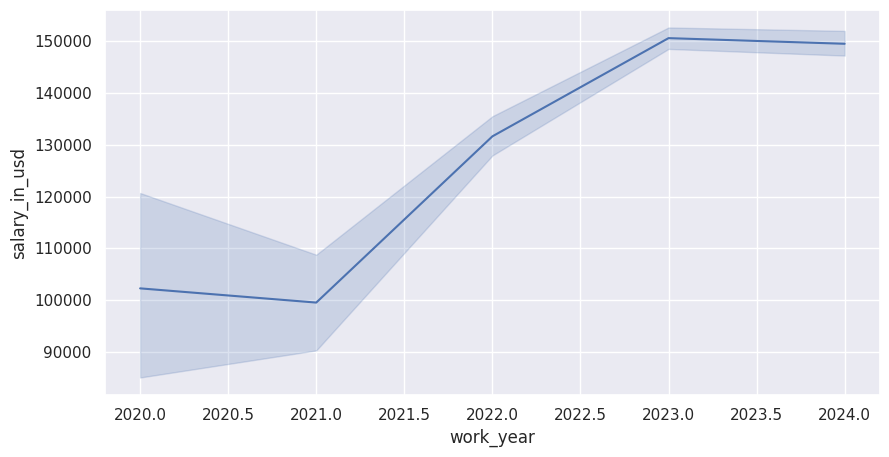

In [ ]:
#Viewing salary trend over the years
sns.lineplot(x='work_year',y='salary_in_usd',data=df)

**As we can see the salary trend is not perfectly a straight line. There are certain deviations and in 2024 the salary is slightly lower than 2023 for data science jobs**

# **Multivariate Analysis**

<Axes: xlabel='employee_residence', ylabel='salary_in_usd'>

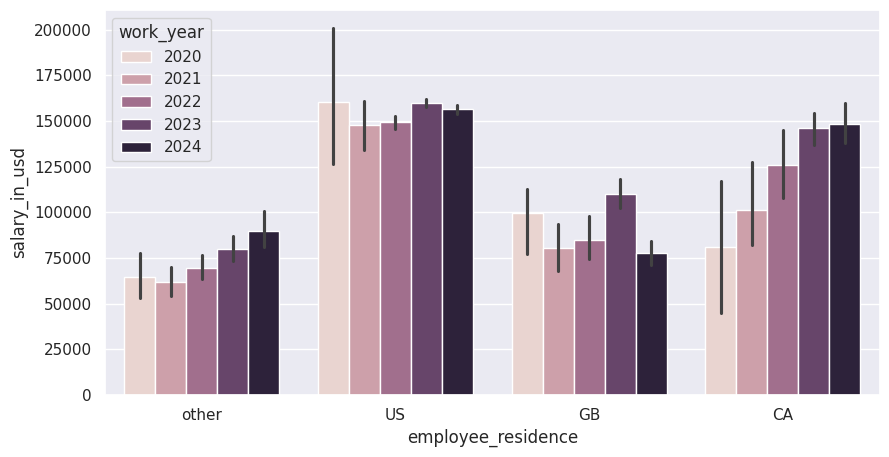

In [ ]:
#Viewing relationship between employee_residence and salary_in_usd over the years
sns.set(rc={"figure.figsize":(10, 5)})
sns.barplot(x='employee_residence',y='salary_in_usd',data=df,hue='work_year')

**For CANADA the salary has increased over the past years but for US 2020 was the best year for employees in terms of salary**

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

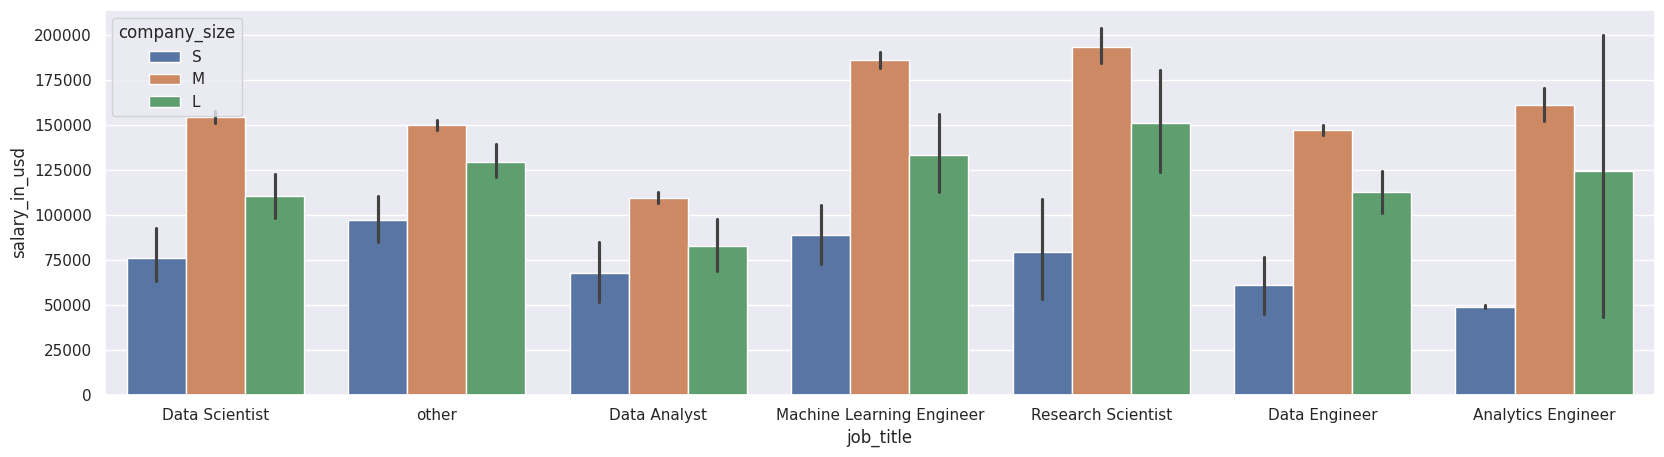

In [ ]:
#Viewing relationship between job_title and salary_in_usd w.r.t company_size
sns.set(rc={"figure.figsize":(20, 5)})
sns.barplot(x='job_title',y='salary_in_usd',data=df,hue='company_size')

**Medium level companies' employees are earning more**

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

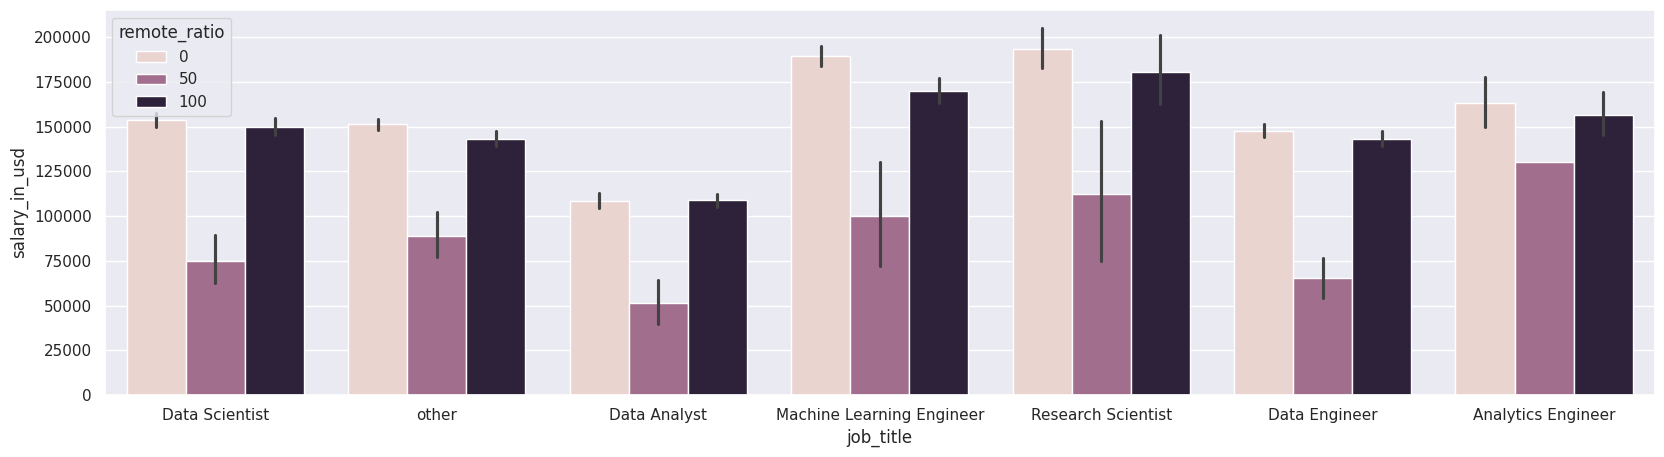

In [ ]:
#Viewing relationship between job_title and salary_in_usd w.r.t remote_ratio
sns.set(rc={"figure.figsize":(20, 5)})
sns.barplot(x='job_title',y='salary_in_usd',data=df,hue='remote_ratio')

**So in every field the employees who are not working remotely are earning more**

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

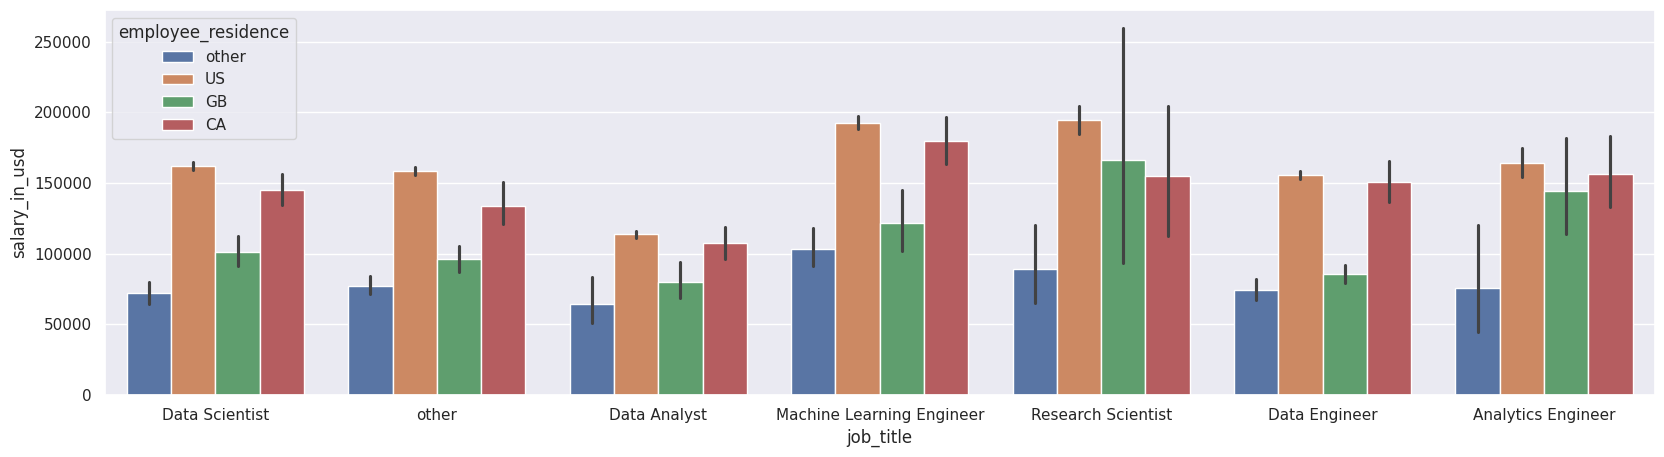

In [ ]:
#Viewing relationship between job_title and salary_in_usd w.r.t employee_residence
sns.set(rc={"figure.figsize":(20, 5)})
sns.barplot(x='job_title',y='salary_in_usd',data=df,hue='employee_residence')

**In US & GB Research Scientist is the highest paying job but in CA Machine Learning Engineer is the highest paying job**